<a href="https://colab.research.google.com/github/bombom93/bigcontest/blob/master/%EC%83%81%ED%92%88%EA%B5%B0%EB%B3%84_3%EA%B0%80%EC%A7%80_%EB%B3%80%EC%88%98_%EB%B0%95%EC%8A%A4%ED%94%8C%EB%9E%8F_%ED%95%9C%EB%B2%88%EC%97%90_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# 농수축 & 이미용 EDA
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# 한글 깨짐 처리
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [89]:
df = pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/data_information/bigcontest_record_train.xlsx', header=1)
features = ['broadcast', 'exp_min', 'm_code', 'p_code', 'p_name', 'p_group', 'unit_price', 'total_price']
df.columns=features
df['sales_amount'] = round(df['total_price'] / df['unit_price'],1)

df['broadcast'] = df['broadcast'].astype('datetime64[ns]')
df['weekday'] = df.broadcast.dt.weekday + 1 # 월요일:1, 일요일:7
df['month'] = df.broadcast.dt.month
df['day'] = df.broadcast.dt.day
df['hour'] = df.broadcast.dt.hour
df['quarter'] = df.broadcast.dt.quarter

In [91]:
p_group_list = df.p_group.unique()

In [94]:
def group_df(group_name):
  return df[df.p_group == group_name]

def exp_nan(group_name):
  df = group_df(group_name)
  print(group_name, 'exp_min의 결측값 개수:', df[(df['exp_min'].isnull() == True)].shape[0])
  # return df[(df['exp_min'].isnull() == True)]

def box_plot(group_name):
  times = ['month','weekday','hour']
  features = ['total_price','sales_amount','unit_price']
  nrows = ncols = 3  
  
  fig, axes = plt.subplots(nrows,ncols, figsize = (18,18))

  for row, time in enumerate(times):
    for col ,feature in enumerate(features):
      
      g = sns.boxplot(x=time, y=feature, data=group_df(group_name), ax=axes[row,col])
      # g.set_xlabel(time)
      # g.set_ylabel(feature)

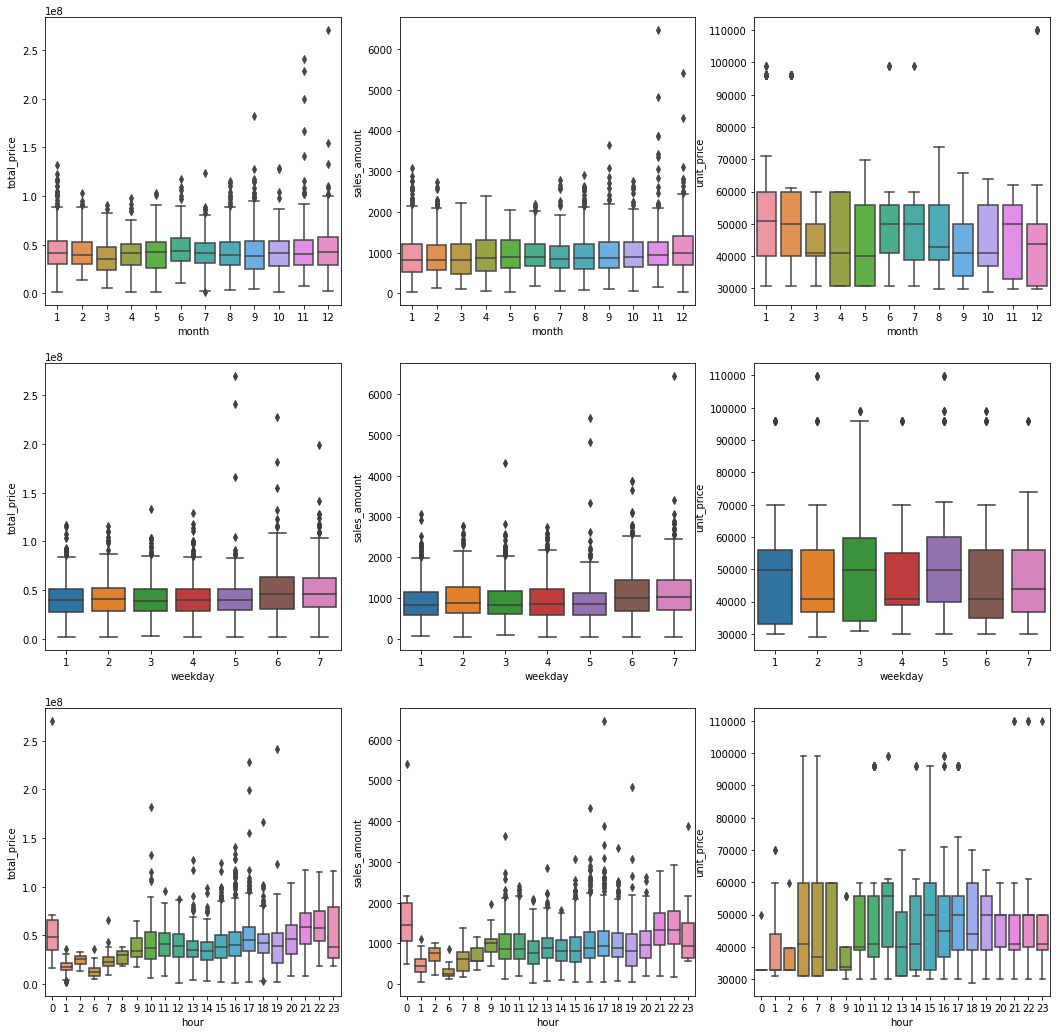

In [95]:
box_plot('농수축')